<a href="https://colab.research.google.com/github/secutron/TesTime/blob/main/test__controlnet_aux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참조: [controlnet_aux](https://github.com/patrickvonplaten/controlnet_aux)


In [1]:
!pip install controlnet-aux

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.0/231.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 89.1 MB/s eta 0:00:00


### 입력 이미지 선택
- /content/controlnet_aux/datasets/input/input 에 파일 업로드한다.

Image successfully uploaded:


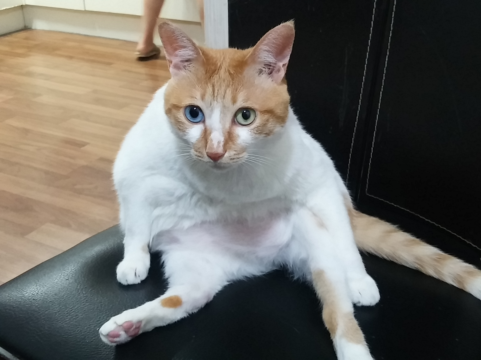

In [2]:
import os
import shutil
import imghdr
from google.colab import files
from pathlib import Path
from IPython.display import clear_output
from PIL import Image
from torchvision.transforms import Resize

def display_image(img):
  w, h = img.size
  if max(w, h) > 480:
    img = Resize(480, max_size=481)(img)
  display(img)

def process_upload(uploaded, data_path):
  if len(uploaded.keys()) > 1:
    clear_output(wait=True)
    for fn in uploaded.keys():
      os.remove(fn)
    print("Please choose 1 file!")
  else:
    fn = list(uploaded.keys())[0]
    if imghdr.what(fn) is None:
      clear_output(wait=True)
      print("Please upload a valid image file")
      os.remove(fn)
    else:
      dest_path = f"{data_path}/{fn}"
      shutil.move(fn, dest_path)
      clear_output(wait=True)
      print("Image successfully uploaded:")
      uploaded_image = Image.open(dest_path)
      display_image(uploaded_image)


!mkdir /content/controlnet_aux
os.chdir("/content/controlnet_aux")

DATAROOT = "./datasets/input"
path_dataroot = Path(DATAROOT)
if os.path.exists(path_dataroot):
  shutil.rmtree(path_dataroot)

path_input = Path(f"{DATAROOT}/input")
path_input.mkdir(parents=True, exist_ok=True)

shutil.rmtree(path_input)
path_input.mkdir(parents=True)
uploaded = files.upload()
process_upload(uploaded, f"{DATAROOT}/input")

### 업로드된 이미지에 접근

In [4]:
from io import BytesIO

last_uploaded = list(uploaded.keys())[-1]
im = Image.open(BytesIO(uploaded[last_uploaded]))

### controlnet_aux 처리

In [5]:
from controlnet_aux.processor import Processor

# as of 230606, options are:
'''
MODELS = {
    # checkpoint models
    'hed': {'class': HEDdetector, 'checkpoint': True},
    'midas': {'class': MidasDetector, 'checkpoint': True},
    'mlsd': {'class': MLSDdetector, 'checkpoint': True},
    'openpose': {'class': OpenposeDetector, 'checkpoint': True},
    'pidinet': {'class': PidiNetDetector, 'checkpoint': True},
    'normalbae': {'class': NormalBaeDetector, 'checkpoint': True},
    'lineart': {'class': LineartDetector, 'checkpoint': True},
    'lineart_coarse': {'class': LineartDetector, 'checkpoint': True},
    'lineart_anime': {'class': LineartAnimeDetector, 'checkpoint': True},
    'zoe': {'class': ZoeDetector, 'checkpoint': True}, 
    # instantiate
    'content_shuffle': {'class': ContentShuffleDetector, 'checkpoint': False},
    'mediapipe_face': {'class': MediapipeFaceDetector, 'checkpoint': False},
    'canny': {'class': CannyDetector, 'checkpoint': False},
}
'''


# 
processor_id = 'hed'
processor = Processor(processor_id)

processed_image = processor(im)

Loading hed processor


/usr/local/lib/python3.10/dist-packages/controlnet_aux/mediapipe_face/mediapipe_face_common.py:7: UserWarning: The module 'mediapipe' is not installed. The package will have limited functionality. Please install it using the command: pip install 'mediapipe'
  warnings.warn(


### 처리된 결과 확인

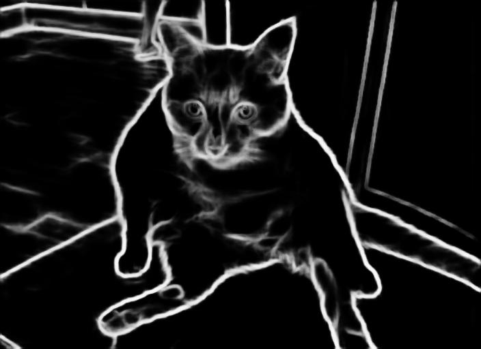

In [6]:
data_io = BytesIO(processed_image)
img_pil = Image.open(data_io)
display_image(img_pil)